# **Example:** Read PDF documents with images using Vanilla Reader

<p style="text-align:center;">
<img src="https://raw.githubusercontent.com/andreshere00/Splitter_MR/refs/heads/main/docs/assets/vanilla_reader_button.svg#only-light" alt="VanillaReader logo">
<img src="https://raw.githubusercontent.com/andreshere00/Splitter_MR/refs/heads/main/docs/assets/vanilla_reader_button_white.svg#only-dark" alt="VanillaReader logo">
</p>

In this tutorial we will see how to read a PDF using our custom component, which is based on **PDFPlumber**. Then, we will connect this reader component into Visual Language Models to extract text or get annotations from images inside the PDF. In addition, we will explore which options we have to analyze and extract the content of the PDF in a custom, fast and comprehensive way. Let's dive in.

!!! note
Remember that you can access the complete documentation of this Reader Component in the [**Developer Guide**](../../api_reference/reader.md#vanillareader).

## How to connect a VLM to VanillaReader

For this tutorial, we will use the same data as the first tutorial. [**Consult reference here**](https://raw.githubusercontent.com/andreshere00/Splitter_MR/refs/heads/main/data/sample_pdf.pdf).

To extract image descriptions or perform OCR, instantiate any model that implements the [`BaseModel` interface](../../api_reference/model.md#basevisionmodel) (vision variants inherit from it) and pass it into the `VanillaReader`. Swapping providers only changes the model constructor; your Reader usage remains the same.

### Supported models (and when to use them)

| Model (docs)                                                                    | When to use                                       | Required environment variables                                                                                        |
| ------------------------------------------------------------------------------- | ------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| [`OpenAIVisionModel`](../../api_reference/model.md#openaivisionmodel)           | You have an OpenAI API key and want OpenAI cloud. | `OPENAI_API_KEY` (optional: `OPENAI_MODEL`, defaults to `gpt-4o`)                                                     |
| [`AzureOpenAIVisionModel`](../../api_reference/model.md#azureopenaivisionmodel) | You use Azure OpenAI Service.                     | `AZURE_OPENAI_API_KEY`, `AZURE_OPENAI_ENDPOINT`, `AZURE_OPENAI_DEPLOYMENT`, `AZURE_OPENAI_API_VERSION`                |
| [`GrokVisionModel`](../../api_reference/model.md#grokvisionmodel)               | You have access to xAI Grok multimodal.           | `XAI_API_KEY` (optional: `XAI_MODEL`, default `grok-4`)                                                               |
| [`GeminiVisionModel`](../../api_reference/model.md#geminivisionmodel)           | You want Google’s Gemini vision models.           | `GEMINI_API_KEY` (also install extras: `pip install "splitter-mr[multimodal]"`)                                       |
| [`AnthropicVisionModel`](../../api_reference/model.md#anthropicvisionmodel)     | You have an Anthropic key (Claude Vision).        | `ANTHROPIC_API_KEY` (optional: `ANTHROPIC_MODEL`)                                                                     |
| [`HuggingFaceVisionModel`](../../api_reference/model.md#huggingfacevisionmodel) | You prefer local/open-source/offline inference.   | Install extras: `pip install "splitter-mr[multimodal]"` (optional: `HF_ACCESS_TOKEN` if the chosen model requires it) |

> **Note on HuggingFace models:** Not all HF models are supported (e.g., gated or uncommon architectures). A well-tested option is **SmolDocling**.

### Environment variables

<details>
  <summary><b>Show/hide environment variables needed for every provider</b></summary>

  <h4>OpenAI</h4> 

```txt
# OpenAI
OPENAI_API_KEY=<your-api-key>
# (optional) OPENAI_MODEL=gpt-4o
```

  <h4>Azure OpenAI</h4>

```txt
# Azure OpenAI
AZURE_OPENAI_API_KEY=<your-api-key>
AZURE_OPENAI_ENDPOINT=<your-endpoint>
AZURE_OPENAI_API_VERSION=<your-api-version>
AZURE_OPENAI_DEPLOYMENT=<your-model-name>
```

  <h4>xAI Grok</h4>

```txt
# xAI Grok
XAI_API_KEY=<your-api-key>
# (optional) XAI_MODEL=grok-4
```

  <h4>Google Gemini</h4>

```txt
# Google Gemini
GEMINI_API_KEY=<your-api-key>
# Also: pip install "splitter-mr[multimodal]"
```

  <h4>Anthropic (Claude Vision)</h4>

```txt
# Anthropic (Claude Vision)
ANTHROPIC_API_KEY=<your-api-key>
# (optional) ANTHROPIC_MODEL=claude-sonnet-4-20250514
```

  <h4>Hugging Face (local/open-source)</h4>

```txt
# Hugging Face (optional, only if needed by the model)
HF_ACCESS_TOKEN=<your-hf-token>
# Also: pip install "splitter-mr[multimodal]"
```

</details>

### Instantiation examples

<details>
  <summary><b>Show/hide instantiation snippets for all providers</b></summary>

  <h4>OpenAI</h4>

```python
from splitter_mr.model import OpenAIVisionModel

# Reads OPENAI_API_KEY (and optional OPENAI_MODEL) from .env if present
model = OpenAIVisionModel()
# or pass explicitly:
# model = OpenAIVisionModel(api_key="...", model_name="gpt-4o")
```

  <h4>Azure OpenAI</h4>

```python
from splitter_mr.model import AzureOpenAIVisionModel

# Reads Azure vars from .env if present
model = AzureOpenAIVisionModel()
# or:
# model = AzureOpenAIVisionModel(
#     api_key="...",
#     azure_endpoint="https://<resource>.openai.azure.com/",
#     api_version="2024-02-15-preview",
#     azure_deployment="<your-deployment-name>",
# )
```

  <h4>xAI Grok</h4>

```python
from splitter_mr.model import GrokVisionModel

# Reads XAI_API_KEY (and optional XAI_MODEL) from .env
model = GrokVisionModel()
```

  <h4>Google Gemini</h4>

```python
from splitter_mr.model import GeminiVisionModel

# Requires GEMINI_API_KEY and the 'multimodal' extra installed
model = GeminiVisionModel()
```

  <h4>Anthropic (Claude Vision)</h4>

```python
from splitter_mr.model import AnthropicVisionModel

# Reads ANTHROPIC_API_KEY (and optional ANTHROPIC_MODEL) from .env
model = AnthropicVisionModel()
```

  <h4>Hugging Face (local/open-source)</h4>

```python
from splitter_mr.model import HuggingFaceVisionModel

# Token only if the model requires gating
model = HuggingFaceVisionModel()
```

</details>


In [1]:
from splitter_mr.model import AzureOpenAIVisionModel

model = AzureOpenAIVisionModel()


Then, use the Reader component and insert the model as parameter:

In [2]:
from splitter_mr.reader import VanillaReader

reader = VanillaReader(model=model)


Then, you can read the file. The result will be an object from the type `ReaderOutput`, which is a dictionary containing some metadata about the file. To get the content, you can access to the `text` attribute:

In [3]:
file = "data/sample_pdf.pdf"

output = reader.read(file_path=file)
print(output.text)

<!-- page -->

A sample PDF
Converting PDF files to other formats, such as Markdown, is a surprisingly
complex task due to the nature of the PDF format itself. PDF (Portable
Document Format) was designed primarily for preserving the visual layout of
documents, making them look the same across different devices and
platforms. However, this design goal introduces several challenges when trying to
extract and convert the underlying content into a more flexible, structured format
like Markdown.

<!-- image -->
*Caption: Logo of SplitterMR, a tool for chunking documents to prepare them for large language model applications.*

Ilustración 1. SplitterMR logo.
1. Lack of Structural Information
Unlike formats such as HTML or DOCX, PDFs generally do not store
information about the logical structure of the document—such as
headings, paragraphs, lists, or tables. Instead, PDFs are often a collection
of text blocks, images, and graphical elements placed at specific
coordinates on a page. This makes


As observed, all the images have been described by the LLM.


## Experimenting with some keyword arguments

Suppose that you need to simply get the base64 images from the file. Then, you can use the option `show_base64_images` to get those images:

<!-- page -->

A sample PDF
Converting PDF files to other formats, such as Markdown, is a surprisingly
complex task due to the nature of the PDF format itself. PDF (Portable
Document Format) was designed primarily for preserving the visual layout of
documents, making them look the same across different devices and
platforms. However, this design goal introduces several challenges when trying to
extract and convert the underlying content into a more flexible, structured format
like Markdown.



Ilustración 1. SplitterMR logo.
1. Lack of Structural Information
Unlike formats such as HTML or DOCX, PDFs generally do not store
information about the logical structure of the document—such as
headings, paragraphs, lists, or tables. Instead, PDFs are often a collection
of text blocks, images, and graphical elements placed at specific
coordinates on a page. This makes it difficult to accurately infer the
intended structure, such as determining what text is a heading versus a
regular paragraph.
2
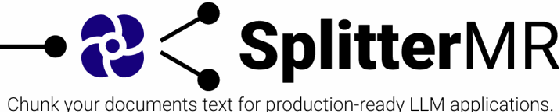
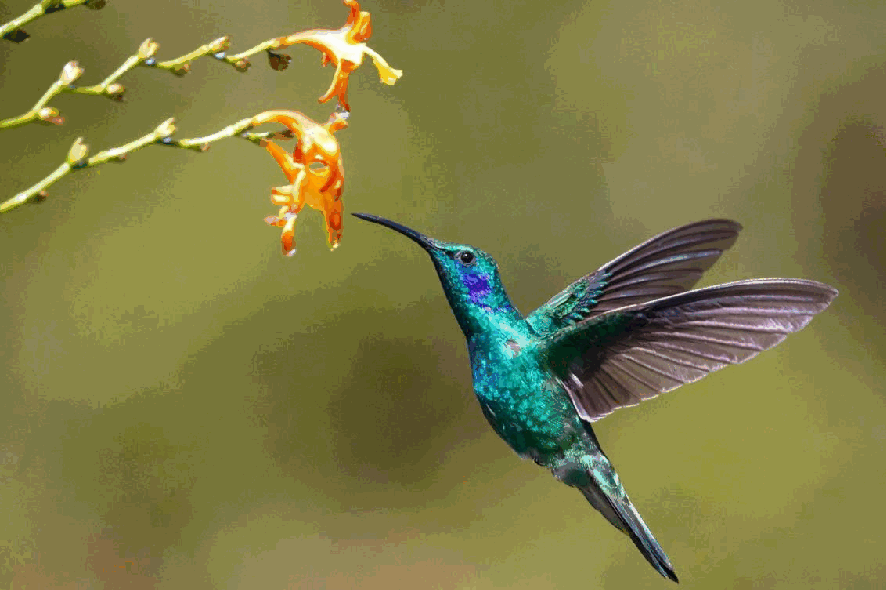

In [4]:
reader = VanillaReader()
output = reader.read(file_path=file, show_base64_images=True)
print(output.text)


In addition, you can modify how the image and page placeholders are generated with the options `image_placeholder` and `page_placeholder`. *Note that in this case we are not using any VLM*.

In [5]:
reader = VanillaReader()
output = reader.read(
    file_path=file, image_placeholder="## Image", page_placeholder="## Page"
)
print(output.text)

## Page

A sample PDF
Converting PDF files to other formats, such as Markdown, is a surprisingly
complex task due to the nature of the PDF format itself. PDF (Portable
Document Format) was designed primarily for preserving the visual layout of
documents, making them look the same across different devices and
platforms. However, this design goal introduces several challenges when trying to
extract and convert the underlying content into a more flexible, structured format
like Markdown.

## Image

Ilustración 1. SplitterMR logo.
1. Lack of Structural Information
Unlike formats such as HTML or DOCX, PDFs generally do not store
information about the logical structure of the document—such as
headings, paragraphs, lists, or tables. Instead, PDFs are often a collection
of text blocks, images, and graphical elements placed at specific
coordinates on a page. This makes it difficult to accurately infer the
intended structure, such as determining what text is a heading versus a
regular paragraph.


But one of the most important features is to scan the PDF as PageImages, to analyze every page with a VLM to extract the content. In order to do that, you can simply activate the option `scan_pdf_pages`. 

In [6]:
reader = VanillaReader(model=model)
output = reader.read(file_path=file, scan_pdf_pages=True)
print(output.text)

<!-- page -->

# A sample PDF

Converting PDF files to other formats, such as Markdown, is a surprisingly complex task due to the nature of the PDF format itself. PDF (Portable Document Format) was designed primarily for preserving the visual layout of documents, making them look the same across different devices and platforms. _However, this design goal introduces several challenges when trying to extract and convert the underlying content into a more flexible, structured format like Markdown._

![SplitterMR logo](./images/splittermr_logo.png)

*Illustration 1. SplitterMR logo.*

## 1. Lack of Structural Information

Unlike formats such as HTML or DOCX, PDFs generally do not store information about the logical structure of the document—such as headings, paragraphs, lists, or tables. Instead, PDFs are often a collection of text blocks, images, and graphical elements placed at specific coordinates on a page. This makes it difficult to accurately infer the intended structure, such as det


Remember that you can always customize the prompt to get one or other results using the parameter `prompt`:

In [7]:
reader = VanillaReader(model=model)
output = reader.read(
    file_path=file, prompt="Extract the content of this resource in html format"
)
print(output.text)

<!-- page -->

A sample PDF
Converting PDF files to other formats, such as Markdown, is a surprisingly
complex task due to the nature of the PDF format itself. PDF (Portable
Document Format) was designed primarily for preserving the visual layout of
documents, making them look the same across different devices and
platforms. However, this design goal introduces several challenges when trying to
extract and convert the underlying content into a more flexible, structured format
like Markdown.

<!-- image -->
Certainly! Here is the content of the resource in HTML format:

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8" />
    <title>SplitterMR</title>
</head>
<body>
    <h1>SplitterMR</h1>
    <p>Chunk your documents text for production-ready LLM applications.</p>
</body>
</html>
```

Ilustración 1. SplitterMR logo.
1. Lack of Structural Information
Unlike formats such as HTML or DOCX, PDFs generally do not store
information about the logical structure of the doc


To sum up, we can see that `VanillaReader` is a good option to extract rapidly and efficiently the text content for a PDF file. Remember that you can customize how the extraction is performed. But remember to consult other reading options in the [Developer guide](../../api_reference/reader.md) or [other tutorials](../examples.md).

Thank you so much for reading :).

## Complete script

```python
import os
from splitter_mr.reader import VanillaReader
from splitter_mr.model import AzureOpenAIVisionModel
from dotenv import load_dotenv

load_dotenv()

file = "data/sample_pdf.pdf"
output_dir = "tmp/vanilla_output"
os.makedirs(output_dir, exist_ok=True)

model = AzureOpenAIVisionModel()

# 1. Default with model
reader = VanillaReader(model=model)
output = reader.read(file_path=file)
with open(os.path.join(output_dir, "output_with_model.txt"), "w", encoding="utf-8") as f:
    f.write(output.text)

# 2. Default without model, with base64 images shown
reader = VanillaReader()
output = reader.read(file_path=file, show_base64_images=True)
with open(os.path.join(output_dir, "output_with_base64_images.txt"), "w", encoding="utf-8") as f:
    f.write(output.text)

# 3. Default without model, with placeholders
reader = VanillaReader()
output = reader.read(file_path=file, image_placeholder="## Image", page_placeholder="## Page")
with open(os.path.join(output_dir, "output_with_placeholders.txt"), "w", encoding="utf-8") as f:
    f.write(output.text)

# 4. With model, scan PDF pages
reader = VanillaReader(model=model)
output = reader.read(file_path=file, scan_pdf_pages=True)
with open(os.path.join(output_dir, "output_scan_pdf_pages.txt"), "w", encoding="utf-8") as f:
    f.write(output.text)

# 5. With model, custom prompt
reader = VanillaReader(model=model)
output = reader.read(file_path=file, prompt="Extract the content of this resource in html format")
with open(os.path.join(output_dir, "output_html_prompt.txt"), "w", encoding="utf-8") as f:
    f.write(output.text)
```